# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-01-30 08:58:58.291313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738227538.421567   20969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738227538.455472   20969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

NotFoundError: Could not find directory valid

# Loading Model

In [3]:
cnn = tf.keras.models.load_model("../models/trained_plant_disease_model.keras")

I0000 00:00:1738227635.971260   20969 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


#Visualising and Performing Prediction on Single image

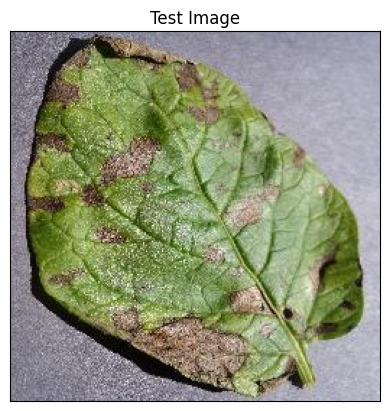

In [5]:
# Test Image Visualization
import cv2
image_path = "../datasets/Plant_Disease_Dataset/test/test/PotatoEarlyBlight1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

I0000 00:00:1738227966.594220   21480 service.cc:148] XLA service 0x7f2464005e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738227966.596075   21480 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
I0000 00:00:1738227967.018877   21480 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-30 09:06:12.839345: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[1,256,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,128,14,14]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is takin

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


I0000 00:00:1738227975.313173   21480 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [7]:
print(predictions)

[[4.71683023e-13 2.97032584e-17 3.58767184e-16 1.91329986e-17
  1.45174592e-18 1.92240083e-17 2.73732909e-19 3.11652538e-15
  5.43000635e-15 2.56890799e-16 2.98859260e-23 2.22224295e-19
  1.63155611e-19 1.15983388e-16 6.54574676e-21 1.87371634e-19
  1.11469946e-16 1.27031657e-21 8.35802243e-16 3.75402156e-20
  1.00000000e+00 3.01169311e-12 1.66547023e-14 2.72985112e-20
  2.06905126e-20 1.16149977e-14 3.71510392e-11 1.51315206e-17
  1.25169255e-19 1.34221730e-15 1.36579316e-11 6.04052811e-17
  1.17973922e-10 2.44665747e-21 1.93618347e-19 9.36851413e-22
  6.21376905e-21 4.21682541e-16]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


In [9]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'class_name' is not defined